# Predicting Boston Housing Prices

For the purposes of this project, the following preprocessing steps have been made to the dataset:

- 16 data points have an 'MEDV' value of 50.0. These data points likely contain missing or censored values and have been removed.
- 1 data point has an 'RM' value of 8.78. This data point can be considered an outlier and has been removed.
- The features 'RM', 'LSTAT', 'PTRATIO', and 'MEDV' are essential. The remaining non-relevant features have been excluded.
- The feature 'MEDV' has been multiplicatively scaled to account for 35 years of market inflation.


We'll start with the reading in the data, and separating the features and prices for homes into different pandas dataframes.

In [11]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.model_selection import ShuffleSplit

# Import supplementary visualizations code visuals.py
#import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('/media/hasan/ec42e2af-0eaa-4b8c-81d5-f2a23ec16363/REPO/Data-Science-Project/housing.csv',error_bad_lines=False)
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print("Boston housing dataset has {} data points with {} variables each.")

Boston housing dataset has {} data points with {} variables each.


In [13]:
features.head()

,RM,LSTAT,PTRATIO
0,6.575,4.98,15.3
1,6.421,9.14,17.8
2,7.185,4.03,17.8
3,6.998,2.94,18.7
4,7.147,5.33,18.7


# Data Exploration¶


In this section, we will make a cursory investigation about the Boston housing data.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we have separated the dataset into features and the target variable. The features, 'RM', 'LSTAT', and 'PTRATIO', give us quantitative information about each data point. The target variable, 'MEDV', will be the variable we seek to predict. These are stored in features and prices, respectively.

# Calculating Statistics¶


In [17]:

# TODO: Minimum price of the data
minimum_price = np.min(prices)

# TODO: Maximum price of the data
maximum_price = np.max(prices)

# TODO: Mean price of the data
mean_price = np.mean(prices)

# TODO: Median price of the data
median_price = np.median(prices)

# TODO: Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${:,.2f}".format(minimum_price))
print("Maximum price: ${:,.2f}".format(maximum_price))
print ("Mean price: ${:,.2f}".format(mean_price))
print ("Median price ${:,.2f}".format(median_price))
print ("Standard deviation of prices: ${:,.2f}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


# Feature Observation

To dive a bit deeper int our data, we are using three features from the Boston housing dataset: 'RM', 'LSTAT', and 'PTRATIO'. For each data point (neighborhood):
        

- 'RM' is the average number of rooms among homes in the neighborhood.
- 'LSTAT' is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- 'PTRATIO' is the ratio of students to teachers in primary and secondary schools in the neighborhood.
Without building a model, let's try to figure out if an increase in the value of a feature would lead to an increase in the value of 'MEDV' or a decrease in the value of 'MEDV'.

- 'RM': An increase in the value of this feature will lead to an increase in the value of 'MEDV'. This is because for you'd expect a home with a higher number of rooms to be more expensive that a home with lower number of rooms.
- 'LSTAT': An increase in the value of this feature will lead to a decrease in the value of 'MEDV'. A lower class homeowner might not be able to afford expensive houses, so you'd expect them to leave in a cheaper home. A higher percentage of such people could correlate to cheaper homes in an area, and thus, a lower 'MEDV' value.
- 'PTRATIO': An increase in the value of this feature will lead to an decrease in the value of 'MEDV'. A low student to teacher ration is typically associated with better education level of a school, as a teacher is able to focus on individual students better (than if there were more students). So, due to the presence of better quality schools, people might be willing to pay more to live in those areas, to provide their children with better education, and the prices might be higher.

We can build scatterplots to see if our intuition is correct.

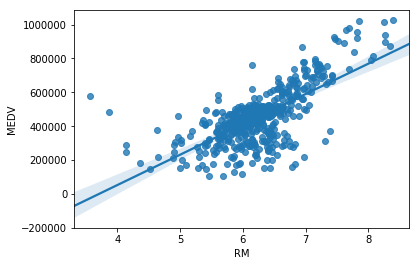

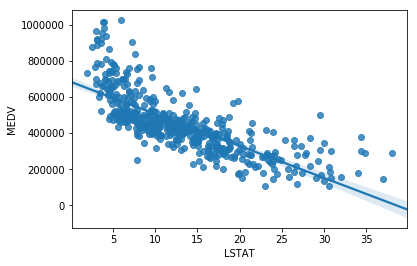

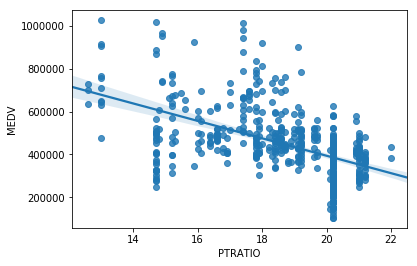

In [21]:

import matplotlib.pyplot as plt
import seaborn as sns

for var in features.columns:
    sns.regplot(data[var],prices)
    plt.show()

# Developing a Model¶

In this section of the project, we will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

For this project, we will calculate the coefficient of determination, R2, to quantify our model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions.

The values for R2 range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the target variable. A model with an R2 of 0 is no better than a model that always predicts the mean of the target variable, whereas a model with an R2 of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the features.

Let's define a function that returns the r2 score for given true and predicted data.

In [22]:

# TODO: Import 'r2_score'
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true,y_predict)
    
    # Return the score
    return score

# Shuffle and Split Data¶

Now we'll take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.



In [24]:
from sklearn.model_selection import train_test_split
# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features,prices,test_size=0.2,random_state=100)

# Success
print("Training and testing split was successful.")

Training and testing split was successful.


# Evaluating Model Performance
In this final section of the project, we will construct a model and make a prediction on the client's feature set using an optimized model from fit_model.

We'll be using Grid Search and Cross Validation techniques in this section.



# Grid Search
The grid search technique is a systematic way of going through different combinations of parameter values while cross validating the results to determine the parameter combination which gives the best performance based on a scoring technique.

In order to optimize a learning algorithm, we can apply grid search by specifying the parameters, and the possible values of those parameters. The grid search then returns the best parameter values for our model, after fitting the supplied data. This takes out the guess-work involved in seeking out the opitimal paramter values for a classifier

# Cross-Validation
The k-fold crossvalidation training technique is a way of splitting the dataset into k partitions of equal size, and then running k separate learning experiments on the training data. In each of the experiments, we chose a training set of the size of k-1 partitions, train our model on that partition, and evaluate the results on the remaining test data. The results/scores for the k experiments are then averaged out.

This technique is benefitial when using grid search to optimize a model because it allows us to look for parameter settings that perform well for different test sets. If we had a single testing set, it's easy to tune a model to perform well for that specific test set (and result in overfitting on the test set in this case), while cross validation allows us to generalize the results.

In [26]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV



In [32]:
def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth': range(1,11)}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search object
    grid = GridSearchCV(regressor,params,scoring_fnc,cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

# Making Predictions
Once a model has been trained on a given set of data, it can be used to make predictions on new sets of input data. In the case of a decision tree regressor, the model has learned what the best questions to ask about the input data are, and can respond with a prediction for the target variable.

# Optimal Model

In [33]:

# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 4 for the optimal model.


# Predicting Selling Prices¶


In [34]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

Predicted selling price for Client 1's home: $401,333.33
Predicted selling price for Client 2's home: $240,947.37
Predicted selling price for Client 3's home: $893,700.00
